In [1]:
import os
import pickle

# Functions from other notebook file.
from ipynb.fs.full.shared_functions_server import *

In [2]:
# Move one directory back to the project root.
os.chdir("..")

In [3]:
# Suppress tensorflow log messages.
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

---

In [4]:
# GLOBALS
STORED_MODEL = 'model-info/vgg16'
SERIALIZED_TRAINING = r'model-info/vgg16-training'

In [5]:
# Open serialized training history data.
with open(SERIALIZED_TRAINING, 'rb') as input_file:
            history = pickle.load(input_file, encoding='bytes')

In [6]:
# GLOBALS
PAD_SIZE = 20
TICK_FONT = 15
LABEL_FONT = 20

TRAINING_ACCURACY = history['acc']
TRAINING_ACCURACY = TRAINING_ACCURACY[0:50:1]

VALIDATION_ACCURACY = history['val_acc']
VALIDATION_ACCURACY = VALIDATION_ACCURACY[0:50:1]

TRAINING_LOSS = history['loss']
TRAINING_LOSS = TRAINING_LOSS[0:50:1]

VALIDATION_LOSS = history['val_loss']
VALIDATION_LOSS = VALIDATION_LOSS[0:50:1]

EPOCHS = range(0, 50)

ACCURACY_FIGURE = 'VGG16-accuracy.png'
LOSS_FIGURE = 'VGG16-loss.png'

---
## Evaluate Model History

In [7]:
validation_score = VALIDATION_ACCURACY[-1] # get the last entry
validation_score = round(validation_score * 100, 2)
print('Validation accuracy (latest): {}%'.format(validation_score))

training_score = TRAINING_ACCURACY[-1] # get the last entry
training_score = round(training_score * 100, 2)
print('Training accuracy (latest): {}%'.format(training_score))

Validation accuracy (latest): 30.9%
Training accuracy (latest): 33.33%


---

In [8]:
validation_score = VALIDATION_LOSS[-1] # get the last entry
validation_score = round(validation_score, 2)
print('Validation loss (latest): {}'.format(validation_score))

training_score = TRAINING_LOSS[-1] # get the last entry
training_score = round(training_score, 2)
print('Training loss (latest): {}'.format(training_score))

Validation loss (latest): 1.92
Training loss (latest): 1.84


---
## Accuracy Figure

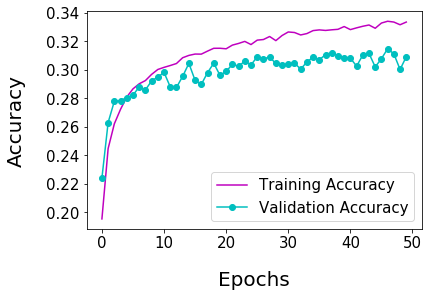

In [9]:
pyplot.plot(EPOCHS, TRAINING_ACCURACY, 'm-', label='Training Accuracy')
pyplot.plot(EPOCHS, VALIDATION_ACCURACY, 'co-', label='Validation Accuracy')

pyplot.xlabel('Epochs', fontsize=LABEL_FONT, labelpad=PAD_SIZE)
pyplot.xticks(fontsize=TICK_FONT)

pyplot.ylabel('Accuracy', fontsize=LABEL_FONT, labelpad=PAD_SIZE)
pyplot.yticks(fontsize=TICK_FONT)

pyplot.legend(loc=4, prop={'size': 15})

acc_fig = pyplot.gcf()
acc_fig.savefig(ACCURACY_FIGURE, dpi=400, bbox_inches='tight')

---
## Loss Figure

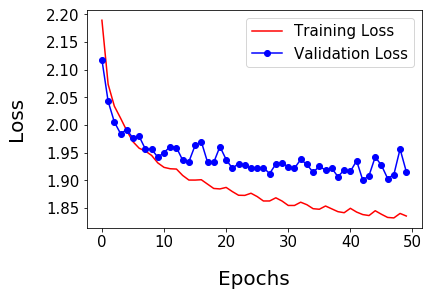

In [10]:
pyplot.plot(EPOCHS, TRAINING_LOSS, 'r-', label='Training Loss')
pyplot.plot(EPOCHS, VALIDATION_LOSS, 'bo-', label='Validation Loss')

pyplot.xlabel('Epochs', fontsize=LABEL_FONT, labelpad=PAD_SIZE)
pyplot.xticks(fontsize=TICK_FONT)

pyplot.ylabel('Loss', fontsize=LABEL_FONT, labelpad=PAD_SIZE)
pyplot.yticks(fontsize=TICK_FONT)

pyplot.legend(loc=1, prop={'size': 15})

loss_fig = pyplot.gcf()
loss_fig.savefig(LOSS_FIGURE, dpi=400, bbox_inches='tight')

---
## Model Architecture

In [11]:
model = models.load_model(STORED_MODEL)
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                46090     
Total params: 14,760,778
Trainable params: 46,090
Non-trainable params: 14,714,688
_________________________________________________________________
